Nama : Rika fitriani

Nim  : 09011381823096

# Support Vector Machine

Support vector machine (SVM) merupakan salah satu dari supervised machine learning yang digunakan untuk mengklasifikasi data.

Pada klasifikasi students performance dataset ini menggunakan kernel "linear" dari support vector machine.

Referensi : https://www.kaggle.com/sakshigoyal7/credit-card-customers


# 1.IMPORT LIBRARIES

In [24]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

In [21]:
# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [22]:
# Allows charts to appear in the notebook
%matplotlib inline

In [23]:
# Pickle package
import pickle

# 2.IMPORT DATA

In [8]:
sp = pd.read_csv('BankChurners.csv')
# To display the top 5 rows
sp.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# 3.SIAPKAN DATA

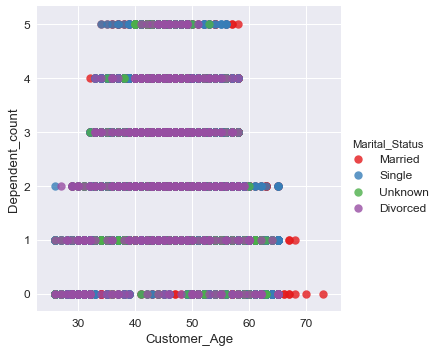

In [9]:
# Plot two ingredients
sns.lmplot('Customer_Age','Dependent_count', data=sp, hue='Marital_Status',palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [10]:
# Specify inputs for the model
# ingredients = sp[['race/ ethnicity','parental level of education','lunch', 'test preparation course','math score','reading score','writing score']].as_matrix()
ingredients = sp[['Customer_Age','Dependent_count']].as_matrix()
type_label = np.where(sp['Marital_Status']=='single', 0, 1)

# Feature names
sp_features = sp.columns.values[1:].tolist()
sp_features

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

#   4. FIT MODEL

In [11]:
# Fit the SVM model
model = svm.SVC(kernel='linear') #menggunakan kernel linear
X = sp[['Customer_Age','Dependent_count']]
y = sp['Marital_Status']
model.fit (X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# 5. VISUALISASI HASIL

In [12]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0,0.5,'Dependent_count')

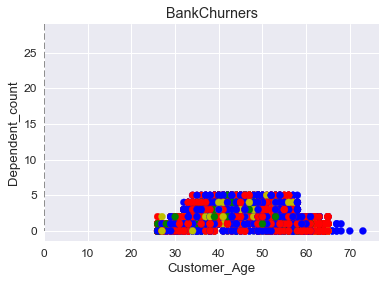

In [13]:
colors = {'Married' : 'b','Single': 'r', 'Unknown' : 'g','Divorced' :'y'}
plt.scatter(sp['Customer_Age'], sp['Dependent_count'],c=[colors[r] for r in sp['Marital_Status']])

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1],30)
yy = np.linspace(ylim[0], ylim[1],30)
XX,YY = np.meshgrid(xx,yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
                 
ax.contour(XX,YY, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])
ax.set_title('BankChurners')
ax.set_xlabel('Customer_Age')
ax.set_ylabel('Dependent_count')

In [14]:
model.predict([[57,44]])

array(['Married'], dtype=object)

In [15]:
model.predict([[90,88]])

array(['Married'], dtype=object)

# 6. PREDIKSI KASUS

In [16]:
# Create a function to guess when a students is a famale or male
def Married_or_single(Customer_Age,Dependent_count):
    if(model.predict([[Customer_Age,Dependent_count]]))==0:
        print('Married lagi!')
    else:
        print('single lagi!')
        
# Predict if 57 reading score and 44 writing score
Married_or_single(57, 44)

single lagi!


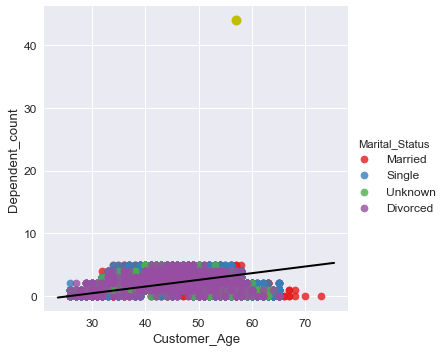

In [17]:
# Plot the point to visually see where the point lies
sns.lmplot('Customer_Age', 'Dependent_count', data=sp, hue='Marital_Status', palette='Set1', fit_reg=False, scatter_kws={"s": 60})
plt.plot(xx, yy, linewidth=2, color='k')
plt.plot(57,44, 'yo', markersize='10');


Train Test Splits

Train test split digunakan untuk memecah data X dan Y ke dalam data untuk training dan data untuk testing. Tujuannya adalah untuk memvalidasi model agar tidak mengukur sampel yang sama dengan data yang digunakan untuk fitting.


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.6, random_state=5, shuffle=True)
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
y1_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y1_pred, y_test)

0.46782952114530196

Keterangan : accuracy_score untuk melihat akurasi hasil prediksi

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_pred, y_test)

array([[   0,    0,    0,    0],
       [ 454, 2843, 2334,  446],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0]], dtype=int64)